## 1. Importing libraries and data, adjusting settings

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
# Defining path

path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Advanced Analytics\Metropolitan Housing Analysis\Data'

In [4]:
# Importing state dataframe

dfstate = pd.read_csv(os.path.join(path, 'Master v8 State Subset.csv'))

In [5]:
# Importing metro dataframe

dfmetro = pd.read_csv(os.path.join(path, 'Master v8 Metro Subset.csv'))

In [6]:
# Ensuring all columns are always shown

pd.options.display.max_columns = None

In [7]:
# Ensuring all graphs are displayed without the need to call them

%matplotlib inline

In [24]:
# Ensuring high decimal precision

pd.set_option('precision', 10)

## 2. Deriving Variable and Preparing Time Series

In [12]:
# Deriving new variable "People per Housing Unit per Acre" to attempt to measure whether people 
# live in more or less dense housing over time.

dfmetro['People per Housing Unit'] = dfmetro['Population Estimate']/dfmetro['Total Housing Units']

In [13]:
dfmetro['People per Housing Unit']

0             NaN
1             NaN
2             NaN
3        2.200378
4        2.201645
           ...   
11298    2.246847
11299    2.214934
11300    2.196932
11301    2.146568
11302         NaN
Name: People per Housing Unit, Length: 11303, dtype: float64

In [14]:
dfmetro['People per Housing Unit per Acre'] = dfmetro['People per Housing Unit']/dfmetro['Unprotected Acreage']

In [15]:
dfmetro['People per Housing Unit per Acre']

0             NaN
1             NaN
2             NaN
3        0.000001
4        0.000001
           ...   
11298    0.000004
11299    0.000004
11300    0.000004
11301    0.000003
11302         NaN
Name: People per Housing Unit per Acre, Length: 11303, dtype: float64

In [30]:
dfmetro = dfmetro.loc[dfmetro['People per Housing Unit per Acre'] < 1000]

In [40]:
dfmetro['Average People per Unit of Housing Density'] = dfmetro.groupby(['Year'])['People per Housing Unit per Acre'].transform(np.mean)

This variable is meant to measure the degree to which people are living in housing with respect to the housing density. Since each area's acreage is constant from 2010-2020 for the purposes of this data set, this variable is essentially People per Unit of Housing just controlled for each area's acreage. As such, it creates a normalized average of whether people are living in more dense housing (higher value) or less dense housing (lower value) across all U.S. metro areas as an area's population increases and as it builds more housing. This is with respect to total land in all CBSAs and doesn't necessarily reflect the type of housing.

Again, if a value is higher, that implies either less acreage (denser), higher population (denser), fewer housing units  (denser, because more people have to pack into fewer housing units), or a combination of all three. If a value is lower, that implies more acreage (less dense), lower population (less dense), or more housing units (less dense, because more people can spread out into more housing units), or a combination of all three.

In [41]:
dfmetro['Average People per Unit of Housing Density'].describe()

count    9901.0000000000
mean        0.0000053012
std         0.0000000287
min         0.0000052554
25%         0.0000052658
50%         0.0000053153
75%         0.0000053238
max         0.0000053365
Name: Average People per Unit of Housing Density, dtype: float64

In [44]:
dfmetro['Average People per Unit of Housing Density'].value_counts()

0.0000052554    926
0.0000052643    926
0.0000053076    912
0.0000052769    912
0.0000052658    912
0.0000053365    896
0.0000053238    896
0.0000053193    896
0.0000053311    875
0.0000053225    875
0.0000053153    875
Name: Average People per Unit of Housing Density, dtype: int64

In [42]:
dfmetro.head(20)

,Year,City (Zillow),Area,CBSA,Type,Key,Unprotected Acreage,% 0 Car Households,% 1 Car Households,% 2+ Car Households,Residential Density,Population Density,Employment Density,Walkability Index W.AVG,Max Walkability Index,Transit Access W.AVG,Annual SF Home Appreciation (HPI),Annual SF Home Appreciation (ZHVI),SF Home Metropolitan Average Value,Population Estimate,Net Population Change,Natural Population Change,International Migration,Domestic Migration,Net Migration,% Population Change,% Migration Pop Change,% Int Mig Pop Change,% Dom Mig Pop Change,% SF Building Permits,% 2 Unit Building Permits,% 3-4 Unit Building Permits,% 5+ Unit Building Permits,% Multi-Unit Building Permits,Total Housing Units,% 1-Unit Detached Houses,% 1-Unit Attached Houses,% SF Houses,% 2 Unit Buildings,% 3-4 Unit Buildings,% 5-9 Unit Buildings,% 10-19 Unit Buildings,% 20+ Unit Buildings,% Multi-Unit Buildings,% Change MU Buildings,% Mobile Homes,"% Boats, RVs, Vans, Etc.",Owner-Occupied Units (Value Computations),"% Value <$50,000","% Value $50,000-$99,999","% Value $100,000-$149,999","% Value $150,000-$199,999","% Value $200,000-$299,999","% Value $300,000-$499,999","% Value $500,000-$999,999","% Value $1,000,000+",Owner-Occupied Unit Value Median (Dollars),Rent Median (Dollars),Occupied Units Paying Rent,% GRAPI <15%,% GRAPI 15-19.9%,% GRAPI 20-24.9%,% GRAPI 25-29.9%,% GRAPI 30-34.9%,% GRAPI >35%,People per Housing Unit,People per Housing Unit per Acre,Average People per Unit of Housing Density
3,2010,"Aberdeen, SD","Aberdeen, SD",10100,Micropolitan,"10100, 2010",1.7927019050e+06,7.14%,29.22%,63.64%,0.010322408,0.022713202,0.012189980,4.690867315,13.16666667,0.0,NaN,NaN,130670.9167,40718.0,115.0,35.0,10.0,69.0,79.0,0.002832303,0.001945669,0.0002462870,0.0016993820,NaN,NaN,NaN,NaN,NaN,18505.0,0.671710349,0.027560119,0.699270467,0.018157255,0.054255607,0.070359362,0.038800324,0.050689003,0.232261551,NaN,0.068467982,0.000000000,11618.0,0.149423309,0.295747977,0.220605956,0.154932002,0.115166122,0.051385781,0.008521260,0.004217593,111800.0,469.0,4409.0,0.201566459,0.231283114,0.147892191,0.090301774,0.048836674,0.280119788,2.2003782761,0.0000012274,0.0000053311
4,2011,"Aberdeen, SD","Aberdeen, SD",10100,Micropolitan,"10100, 2011",1.7927019050e+06,7.14%,29.22%,63.64%,0.010379305,0.022851540,0.012189980,4.690867315,13.16666667,0.0,NaN,0.008641938,131800.1667,40966.0,248.0,116.0,87.0,48.0,135.0,0.006090672,0.003315487,0.0021366470,0.0011788400,NaN,NaN,NaN,NaN,NaN,18607.0,0.679475466,0.032622131,0.712097598,0.021336056,0.055248025,0.063578223,0.033858225,0.047240286,0.221260816,-0.011000735,0.066372870,0.000268716,11881.0,0.141823079,0.258395758,0.223213534,0.177594479,0.129787055,0.059254272,0.006649272,0.003282552,119400.0,498.0,4463.0,0.210202687,0.209747210,0.158961512,0.090639945,0.035527215,0.294921430,2.2016445424,0.0000012281,0.0000053225
5,2012,"Aberdeen, SD","Aberdeen, SD",10100,Micropolitan,"10100, 2012",1.7927019050e+06,7.14%,29.22%,63.64%,0.010422815,0.023194040,0.012189980,4.690867315,13.16666667,0.0,NaN,-0.015956290,129697.1250,41580.0,614.0,58.0,174.0,370.0,544.0,0.014988039,0.013279305,0.0042474250,0.0090318800,NaN,NaN,NaN,NaN,NaN,18685.0,0.687770939,0.032004282,0.719775221,0.022156810,0.051699224,0.062884667,0.037998394,0.042012309,0.216751405,-0.004509411,0.063045223,0.000428151,12106.0,0.137865521,0.225425409,0.231785891,0.186023459,0.144308607,0.061622336,0.009416818,0.003551958,128700.0,517.0,4329.0,0.235501291,0.172106128,0.148861235,0.093683963,0.041324255,0.308523127,2.2253144233,0.0000012413,0.0000053153
6,2013,"Aberdeen, SD","Aberdeen, SD",10100,Micropolitan,"10100, 2013",1.7927019050e+06,7.14%,29.22%,63.64%,0.010514855,0.023517016,0.012189980,4.690867315,13.16666667,0.0,NaN,0.024737441,132905.5000,42159.0,579.0,135.0,18.0,423.0,441.0,0.013924964,0.010606061,0.0004329000,0.0101731600,NaN,NaN,NaN,NaN,NaN,18850.0,0.693527851,0.026153846,0.719681698,0.025464191,0.045782493,0.058779841,0.036763926,0.044084881,0.210875332,-0.005876073

In [62]:
df = dfmetro[['Year', 'Average People per Unit of Housing Density']]

In [63]:
df.head(12)

,Year,Average People per Unit of Housing Density
3,2010,0.0000053311
4,2011,0.0000053225
5,2012,0.0000053153
6,2013,0.0000053365
7,2014,0.0000053238
8,2015,0.0000053193
9,2016,0.0000053076
10,2017,0.0000052769
11,2018,0.0000052658
12,2019,0.0000052554


In [64]:
df = df.reset_index()

In [68]:
df = df.drop(columns = ['index'])

In [66]:
df = df[:11]

In [69]:
df.head(12)

,Year,Average People per Unit of Housing Density
0,2010,0.0000053311
1,2011,0.0000053225
2,2012,0.0000053153
3,2013,0.0000053365
4,2014,0.0000053238
5,2015,0.0000053193
6,2016,0.0000053076
7,2017,0.0000052769
8,2018,0.0000052658
9,2019,0.0000052554


In [71]:
# Setting Year column as index

df = df.set_index('Year')

In [72]:
df

,Average People per Unit of Housing Density
Year,
2010,0.0000053311
2011,0.0000053225
2012,0.0000053153
2013,0.0000053365
2014,0.0000053238
2015,0.0000053193
2016,0.0000053076
2017,0.0000052769
2018,0.0000052658


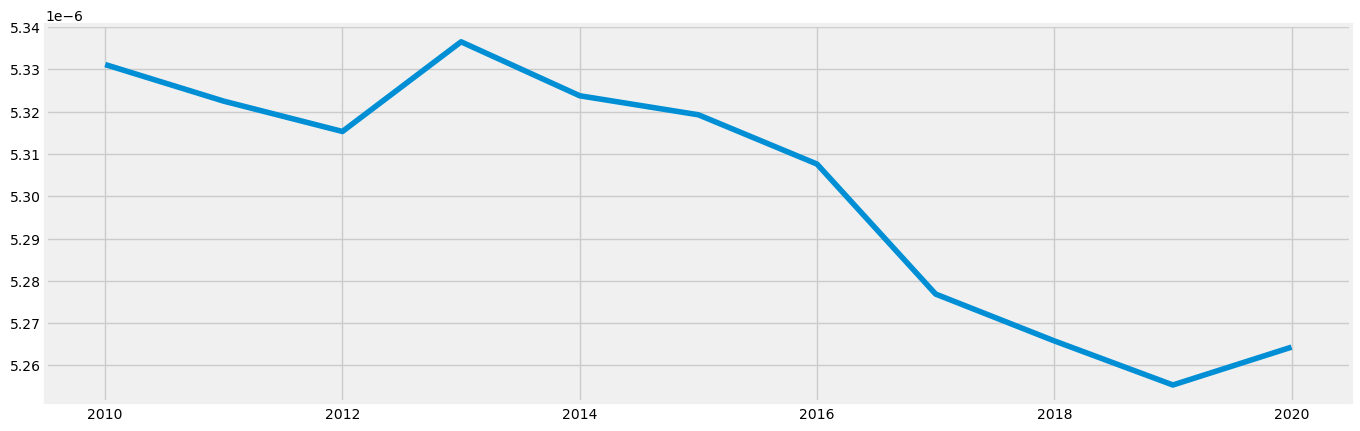

In [73]:
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

Interestingly, the trend is that housing is increasingly less dense despite the fact that the population is growing (a factor that would make people per unit ho *more* dense). This strongly hints that we are building too much single-unit housing in the face of a housing crisis.

## 3. Time Series Analysis: Decomposition

In [75]:
# Decomposing the time series using a multiplicative model

decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative', freq=1) # I am guessing that freq should be 1

In [76]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

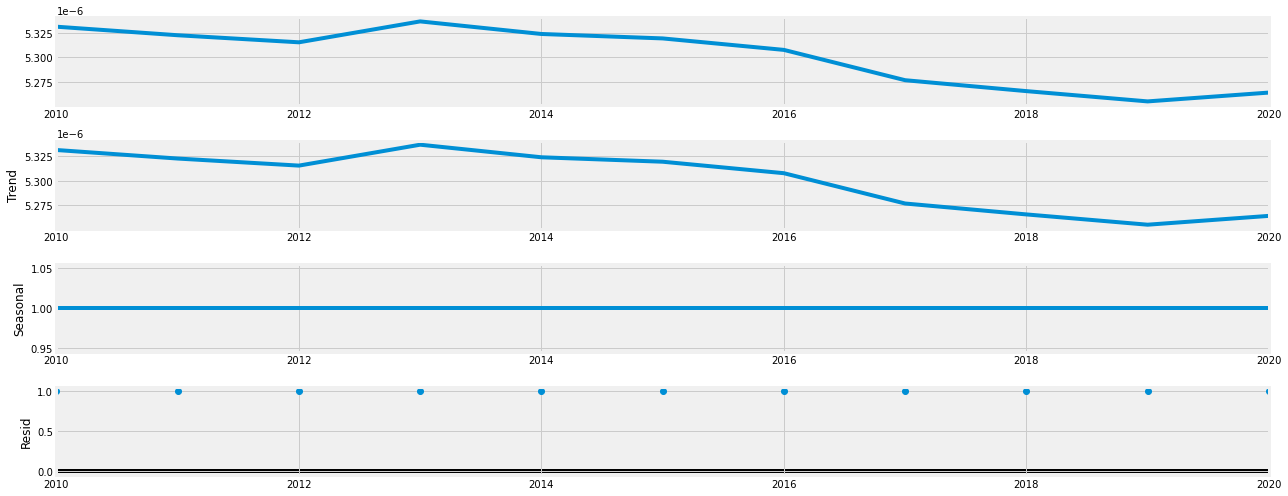

In [77]:
# Plot the separate components

decomposition.plot()
plt.show()

## 4. Testing for Stationarity

In [78]:
# Running Dickey-Fuller Stationarity Test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Average People per Unit of Housing Density'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.0127980599
p-value                        0.0013449597
Number of Lags Used            3.0000000000
Number of Observations Used    7.0000000000
Critical Value (1%)           -4.9386902332
Critical Value (5%)           -3.4775828571
Critical Value (10%)          -2.8438679592
dtype: float64


If I understand correctly, we can be sure of the data's stationarity at a 5% confidence level. The p-value is also low. The null hypothesis is "there exists a unit root in this data", implying the data would be non-stationary. We are disproving it, demonstrating there is no unit root and therefore that the data is stationary.

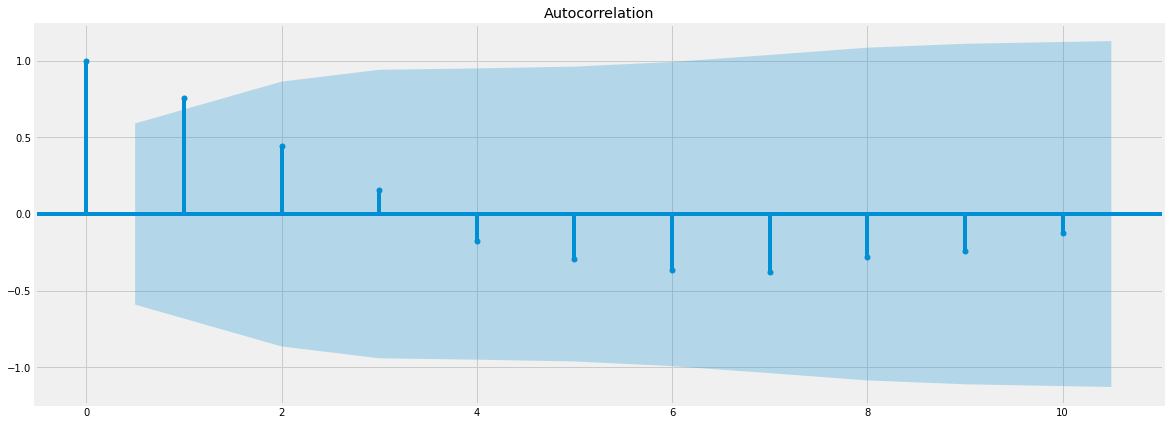

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

## 5. Further Stationarizing, for practice

In [80]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

df_diff = df - df.shift(1)

In [81]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [82]:
df_diff.head()

,Average People per Unit of Housing Density
Year,
2011,-0.0000000087
2012,-0.0000000072
2013,0.0000000212
2014,-0.0000000128
2015,-0.0000000045


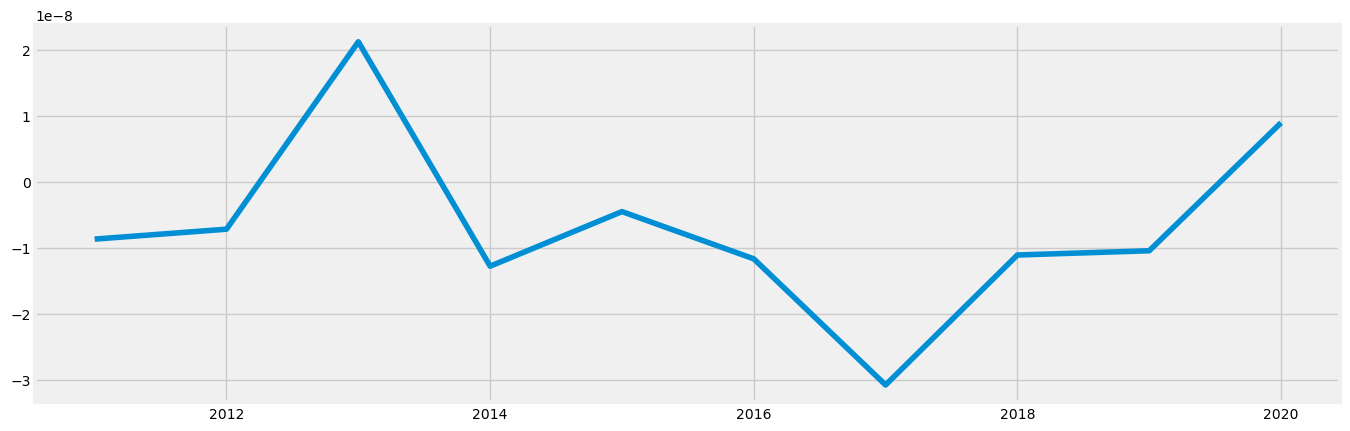

In [84]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [85]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.8676507544e+00
p-value                        5.0837947856e-12
Number of Lags Used            3.0000000000e+00
Number of Observations Used    6.0000000000e+00
Critical Value (1%)           -5.3542564815e+00
Critical Value (5%)           -3.6462381481e+00
Critical Value (10%)          -2.9011977778e+00
dtype: float64


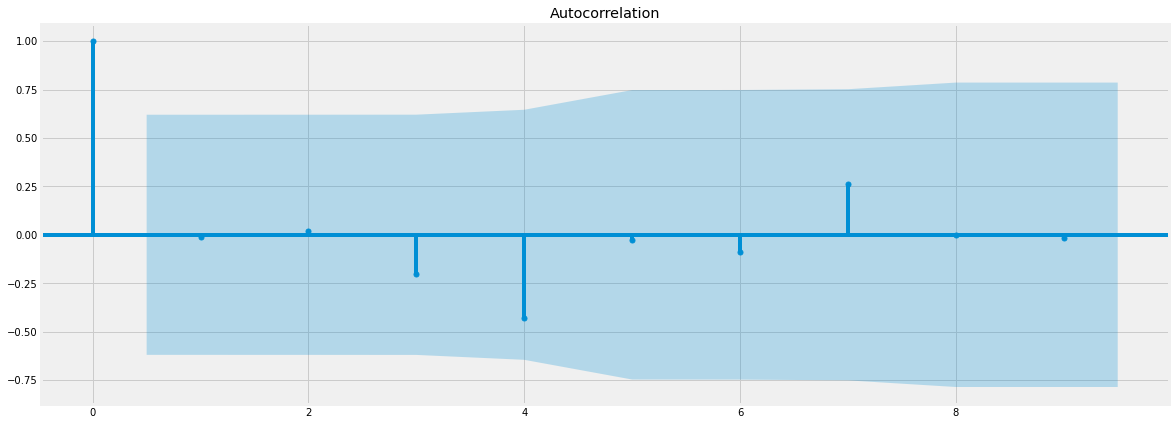

In [86]:
plot_acf(df_diff)
plt.show()